In [1]:
import glob

import matplotlib.pyplot as plt; plt.rcParams.update({"font.family": "serif", "font.size": 12})
import numpy as np

## Individual experiments

In [2]:
experiment: str = "dd"
computer: str = "ibm_kyiv"

In [3]:
alldata = []
for fname in glob.glob(f"{experiment}/{computer}/*/*expectation_values.txt"):
    print(fname)
    alldata.append(np.loadtxt(fname))

# Manually adding data from Sep 8 plots...
if experiment == "bell/raw" and computer == "ibm_kyiv":
    alldata.append(np.array([[1, 0.931], [3, 0.980], [5, 0.986], [7, 0.995]]))
    alldata.append(np.array([[1, 0.946], [3, 0.978], [5, 0.989], [7, 0.991]]))
    alldata.append(np.array([[1, 0.949], [3, 0.973], [5, 0.988], [7, 0.998]]))

alldata = np.array(alldata)
nvals = alldata[0][:, 0]
len(alldata)

dd/ibm_kyiv/15/ibm_kyiv_logical_bell_n357_depth_0_11_02_2024_10:46:25_job_id_csj3mhtfltjvipt6103g_batch_job_id_csj3mjmj0jilb25m16ug_dd_expectation_values.txt
dd/ibm_kyiv/06/ibm_kyiv_logical_bell_n357_depth_0_11_02_2024_10:10:50_job_id_csj35sdfltjvipt5u5q0_batch_job_id_csj360qm05e14r82nah0_dd_expectation_values.txt
dd/ibm_kyiv/05/ibm_kyiv_logical_bell_n357_depth_0_11_02_2024_10:05:55_job_id_csj33o4t276f1ppnroa0_batch_job_id_csj33stfltjvipt5trj0_dd_expectation_values.txt
dd/ibm_kyiv/04/ibm_kyiv_logical_bell_n357_depth_0_11_02_2024_10:00:54_job_id_csj317st276f1ppnrbpg_batch_job_id_csj31bim05e14r82mig0_dd_expectation_values.txt
dd/ibm_kyiv/17/ibm_kyiv_logical_bell_n357_depth_0_11_02_2024_10:53:25_job_id_csj3psuj0jilb25m1p9g_batch_job_id_csj3q04t276f1ppnvflg_dd_expectation_values.txt
dd/ibm_kyiv/14/ibm_kyiv_logical_bell_n357_depth_0_11_02_2024_10:43:25_job_id_csj3l8uj0jilb25m0vag_batch_job_id_csj3lb4t276f1ppnula0_dd_expectation_values.txt
dd/ibm_kyiv/02/ibm_kyiv_logical_bell_n357_depth_0_11

20

In [4]:
average = alldata.mean(axis=0)[:, 1]
std = alldata.std(axis=0, ddof=1)[:, 1]

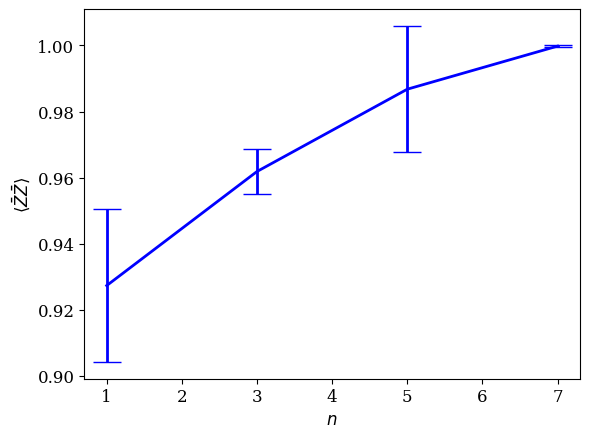

In [5]:
plt.errorbar(nvals, average, yerr=std, capsize=10, lw=2, color="blue")
plt.xlabel("$n$")
plt.ylabel(r"$\langle \bar{Z} \bar{Z} \rangle$");
# plt.savefig("logical-bell-repetition-code-kyiv.pdf")

## Multiple experiments

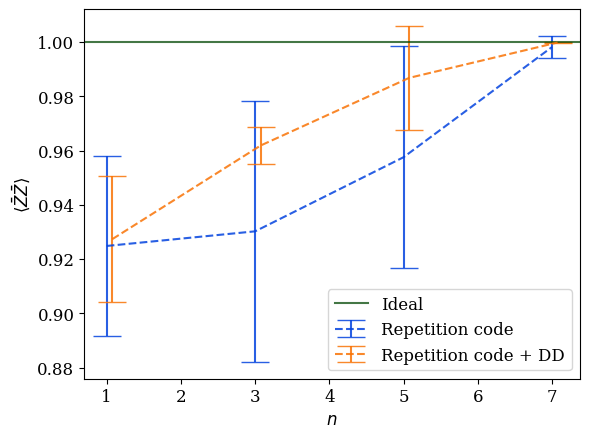

In [6]:
experiments: list[str] = ["raw", "dd"]
labels = ["Repetition code", "Repetition code + DD"]
colors = ["xkcd:blue", "xkcd:orange"]
computer: str = "ibm_kyiv"
stagger = 0.075

for i, (experiment, label) in enumerate(zip(experiments, labels)):
    alldata = []
    for fname in glob.glob(f"{experiment}/{computer}/*/*expectation_values.txt"):
        alldata.append(np.loadtxt(fname))

    # Manually adding data from Sep 8 plots...
    if experiment == "bell/raw" and computer == "ibm_kyiv":
        alldata.append(np.array([[1, 0.931], [3, 0.980], [5, 0.986], [7, 0.995]]))
        alldata.append(np.array([[1, 0.946], [3, 0.978], [5, 0.989], [7, 0.991]]))
        alldata.append(np.array([[1, 0.949], [3, 0.973], [5, 0.988], [7, 0.998]]))

    alldata = np.array(alldata)
    nvals = alldata[0][:, 0]

    average = alldata.mean(axis=0)[:, 1]
    std = alldata.std(axis=0, ddof=1)[:, 1]

    plt.errorbar(nvals + i * stagger, average, yerr=std, linestyle="dashed", color=colors[i], capsize=10, lw=1.5, alpha=0.85, label=label)
plt.axhline(1.0, label="Ideal", alpha=0.75, color="xkcd:darkgreen")
plt.xlabel("$n$")
plt.ylabel(r"$\langle \bar{Z} \bar{Z} \rangle$")
plt.legend();
plt.savefig("logical-bell-repetition-code-kyiv-dd.pdf")